# Raymond Industrial Ltd
## Assignment 2: Python vs Excel
### Melissa Eom
- Datasets obtained from Kaggle (https://www.kaggle.com/olistbr/brazilian-ecommerce)

In [1]:
# import libraries

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

## Data Load

In [2]:
df = pd.read_csv('https://github.com/melissa9813/brazil_ecommerce_analysis/blob/main/Brazilian%20E-Commerce%20Public%20Dataset/olist_products_dataset.csv?raw=true')
df_eng = pd.read_csv('https://github.com/melissa9813/brazil_ecommerce_analysis/raw/main/Brazilian%20E-Commerce%20Public%20Dataset/product_category_name_translation.csv')

## Data Preprocessing

In [3]:
# Check # of Null
df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [4]:
# Delete Null 
df_clean = df.dropna(axis=0)
df_clean.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [5]:
# Count # of rows and columns
df_clean.shape

(32340, 9)

In [6]:
df_clean.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
# Get descriptive statistics
df_clean.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


## Merge Two Tables
#### To translate Portuguese category name into English

In [8]:
df_eng.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
# Merge two tables
df_merge = pd.merge(df_clean, df_eng, how='inner', on=['product_category_name'])
# df_merge.drop_duplicates(inplace=True)
df_merge.reset_index(drop=True, inplace=True)
df_merge

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
...,...,...,...,...,...,...,...,...,...,...
32322,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery
32323,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery
32324,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery
32325,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery


## Analysis
### Step 1) Get average weight by product category

In [10]:
# Average weight for each product category
temp = pd.DataFrame(df_merge.groupby(by=['product_category_name_english'])['product_weight_g'].mean().reset_index())
temp

,product_category_name_english,product_weight_g
0,agro_industry_and_commerce,5263.405405
1,air_conditioning,4459.959677
2,art,1691.763636
3,arts_and_craftmanship,1164.578947
4,audio,641.637931
...,...,...
66,stationery,1763.113074
67,tablets_printing_image,381.444444
68,telephony,236.506173
69,toys,1869.356485


### 2. Get Top 10

In [11]:
# Get top 10
top_10 = temp.sort_values(by='product_weight_g', ascending=False)
top_10 = temp[:10]
top_10.reset_index(drop=True, inplace=True)
top_10

,product_category_name_english,product_weight_g
0,agro_industry_and_commerce,5263.405405
1,air_conditioning,4459.959677
2,art,1691.763636
3,arts_and_craftmanship,1164.578947
4,audio,641.637931
5,auto,2654.650526
6,baby,3655.201525
7,bed_bath_table,2456.405084
8,books_general_interest,746.611111
9,books_imported,596.774194


## Data Visualization

Text(0.5, 1.0, 'Avg Delivery Time by Product Category')

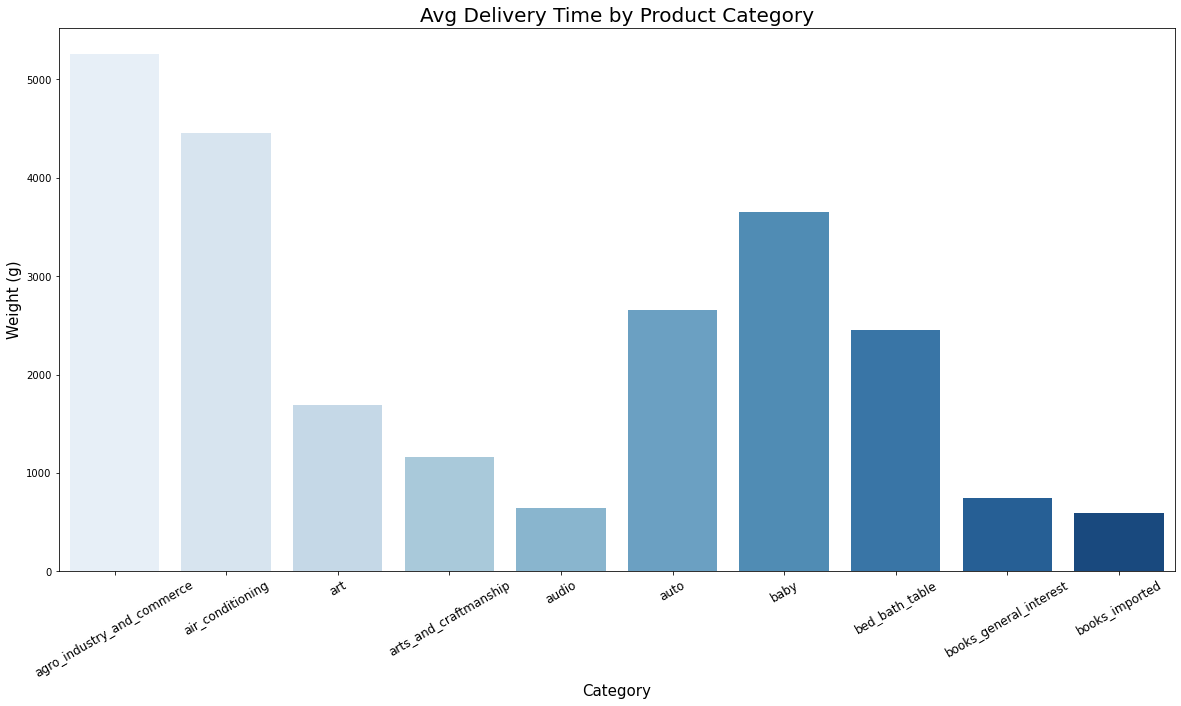

In [12]:
# Graph top_10

plt.figure(figsize=(20,10))
sns.barplot(data=top_10, y='product_weight_g', x='product_category_name_english', palette="Blues")
plt.xticks(rotation=30, fontsize=12)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Weight (g)", fontsize=15)
plt.title("Avg Delivery Time by Product Category", fontsize=20)